## 추천 모델 작성

기존의 word2vec을 이용하여 작성할 예정

사용자가 틀린 문항

what is the 'like' question?

if **다음 등급에**서의 정답률> **현재 등급**에서의 정답률 + a and 다음등급 정답률 >0.5 and 현재등급 정답률 < 0.5:

    사용자['like'] = 그 문항

In [1]:
import pandas as pd
import numpy as np


In [2]:
stu_df= pd.read_csv('dataset/int_student.csv')
stu_df

,student_id,subject_id,test_id,q1_reaction,q2_reaction,q3_reaction,q4_reaction,q5_reaction,q6_reaction,q7_reaction,...,q23_reaction,q24_reaction,q25_reaction,q26_reaction,q27_reaction,q28_reaction,q29_reaction,q30_reaction,score,grade
0,1157,20100,2002,3,5,3,5,2,1,2,...,6,8,10,9,21,75,330,7,12,5
1,4239,20100,2002,1,4,5,5,2,3,4,...,60,12,8,78,54,37,19,19,18,5
2,1504,20100,2002,1,5,4,4,3,1,1,...,45,13,20,16,60,340,304,24,78,3
3,3197,20100,2002,1,5,5,4,3,1,1,...,45,0,0,0,0,0,0,0,48,5
4,5852,20100,2002,1,5,5,4,3,1,1,...,45,13,20,3,60,682,0,0,72,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88218,522,21150,2110,2,3,1,3,3,2,1,...,6,8,20,29,9,5,0,0,65,5
88219,2897,21150,2110,2,3,1,3,3,2,4,...,6,16,20,29,9,7,0,0,65,5
88220,7061,21150,2110,2,3,1,3,3,2,4,...,6,8,20,0,0,0,0,0,68,5
88221,1241,21150,2110,2,3,1,3,3,2,2,...,6,8,20,29,9,13,136,0,73,5


In [3]:
que_df = pd.read_csv('dataset/question.csv')
que_df

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate
0,20100200201,True,1,1,1,1,2,0.713,False,0.982609,0.995652,0.972973,0.979798,0.526657
1,20100200202,True,4,1,1,5,2,0.756,False,1.000000,0.995652,0.995495,0.994949,0.590058
2,20100200203,True,1,3,1,5,2,0.720,False,1.000000,0.991304,0.959459,0.987374,0.537464
3,20100200204,True,0,2,3,4,3,0.617,False,1.000000,1.000000,0.990991,0.997475,0.353026
4,20100200205,True,1,1,3,3,3,0.524,False,1.000000,0.986957,0.945946,0.924242,0.226225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,21150211026,False,1,3,3,29,4,0.568,False,0.968254,0.894737,0.807692,0.740331,0.385576
1016,21150211027,False,3,3,2,9,4,0.629,False,0.984127,0.932331,0.846154,0.729282,0.477115
1017,21150211028,False,4,1,2,57,4,0.171,False,0.777778,0.421053,0.223077,0.198895,0.055479
1018,21150211029,False,3,1,5,160,4,0.183,False,0.809524,0.466165,0.284615,0.198895,0.054092


In [4]:
try_df = pd.read_csv('dataset/trys.csv')
try_df

,student_id,question_id,part_L,part_M,part_S,reaction,correct_rate,right
0,1157,20100200201,1,1,1,3,0.713,0
1,1157,20100200202,4,1,1,5,0.756,1
2,1157,20100200203,1,3,1,3,0.720,0
3,1157,20100200204,0,2,3,5,0.617,0
4,1157,20100200205,1,1,3,2,0.524,0
...,...,...,...,...,...,...,...,...
2646685,7473,21150211026,1,3,3,29,0.568,1
2646686,7473,21150211027,3,3,2,9,0.629,1
2646687,7473,21150211028,4,1,2,31,0.171,0
2646688,7473,21150211029,3,1,5,160,0.183,1


In [5]:
try_df['grade'] = 5
try_df

,student_id,question_id,part_L,part_M,part_S,reaction,correct_rate,right,grade
0,1157,20100200201,1,1,1,3,0.713,0,5
1,1157,20100200202,4,1,1,5,0.756,1,5
2,1157,20100200203,1,3,1,3,0.720,0,5
3,1157,20100200204,0,2,3,5,0.617,0,5
4,1157,20100200205,1,1,3,2,0.524,0,5
...,...,...,...,...,...,...,...,...,...
2646685,7473,21150211026,1,3,3,29,0.568,1,5
2646686,7473,21150211027,3,3,2,9,0.629,1,5
2646687,7473,21150211028,4,1,2,31,0.171,0,5
2646688,7473,21150211029,3,1,5,160,0.183,1,5


In [6]:
try_df['pre'] = try_df['question_id'] / 100
try_df['pre'] = try_df['pre'].astype(int)
try_df['pre']

0          201002002
1          201002002
2          201002002
3          201002002
4          201002002
             ...    
2646685    211502110
2646686    211502110
2646687    211502110
2646688    211502110
2646689    211502110
Name: pre, Length: 2646690, dtype: int64

In [7]:
from tqdm import tqdm

In [8]:
for j, df in tqdm(stu_df.iterrows()):
    s_id = df['student_id']
    q_id_pre = df['subject_id']*10000 + df['test_id']
    try_df.loc[(try_df['student_id'] == s_id) & (try_df['pre'] == q_id_pre),'grade'] = df['grade']

88223it [36:11, 40.62it/s]


In [9]:
cols = ['g1_correct_rate', 'g2_correct_rate', 'g3_correct_rate',
       'g4_correct_rate', 'g5_correct_rate', '1_2_gap', '2_3_gap', '3_4_gap',
       '4_5_gap']

In [10]:
que_df[cols[:-4]] = que_df[cols[:-4]].replace(0,np.nan)

In [11]:
for i in range(1,5):
    que_df['{}_{}_gap'.format(i,i+1)] = que_df['g{}_correct_rate'.format(i)]-que_df['g{}_correct_rate'.format(i+1)]

In [12]:
que_df

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap
0,20100200201,True,1,1,1,1,2,0.713,False,0.982609,0.995652,0.972973,0.979798,0.526657,-0.013043,0.022679,-0.006825,0.453141
1,20100200202,True,4,1,1,5,2,0.756,False,1.000000,0.995652,0.995495,0.994949,0.590058,0.004348,0.000157,0.000546,0.404892
2,20100200203,True,1,3,1,5,2,0.720,False,1.000000,0.991304,0.959459,0.987374,0.537464,0.008696,0.031845,-0.027914,0.449910
3,20100200204,True,0,2,3,4,3,0.617,False,1.000000,1.000000,0.990991,0.997475,0.353026,0.000000,0.009009,-0.006484,0.644449
4,20100200205,True,1,1,3,3,3,0.524,False,1.000000,0.986957,0.945946,0.924242,0.226225,0.013043,0.041011,0.021704,0.698018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,21150211026,False,1,3,3,29,4,0.568,False,0.968254,0.894737,0.807692,0.740331,0.385576,0.073517,0.087045,0.067361,0.354756
1016,21150211027,False,3,3,2,9,4,0.629,False,0.984127,0.932331,0.846154,0.729282,0.477115,0.051796,0.086177,0.116872,0.252167
1017,21150211028,False,4,1,2,57,4,0.171,False,0.777778,0.421053,0.223077,0.198895,0.055479,0.356725,0.197976,0.024182,0.143417
1018,21150211029,False,3,1,5,160,4,0.183,False,0.809524,0.466165,0.284615,0.198895,0.054092,0.343358,0.181550,0.085720,0.144803


In [13]:
que_df['grade'] = 5

In [14]:
for i in range(1,5):
    que_df.loc[(que_df['{}_{}_gap'.format(i,i+1)]>0.1) & (que_df['g{}_correct_rate'.format(i)]>0.5) & 
             (que_df['g{}_correct_rate'.format(i+1)]<0.5),'grade'] = i

In [15]:
que_df[que_df['grade']==1]

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap,grade
28,20100200229,False,1,3,2,34,4,0.055,False,0.573913,0.178261,0.049550,0.017677,0.002882,0.395652,0.128711,0.031873,0.014795,1
50,20100200321,True,0,2,2,1,4,0.108,False,0.516393,0.169492,0.110169,0.093434,0.062292,0.346902,0.059322,0.016735,0.031142,1
140,20100200621,True,2,3,4,3,4,0.239,False,0.782051,0.496732,0.330961,0.189655,0.143901,0.285319,0.165771,0.141306,0.045755,1
148,20100200629,False,1,3,2,777,4,0.116,False,0.807692,0.333333,0.224199,0.054187,0.008766,0.474359,0.109134,0.170012,0.045422,1
170,20100200721,True,0,2,5,4,4,0.308,False,0.777778,0.470046,0.406542,0.291667,0.207547,0.307732,0.063504,0.114875,0.084119,1
259,20100201020,True,2,3,4,3,4,0.193,False,0.677419,0.486034,0.272401,0.154589,0.103053,0.191386,0.213632,0.117812,0.051536,1
297,20100201128,False,1,1,5,13,4,0.102,False,0.579618,0.231293,0.129032,0.103976,0.022621,0.348325,0.102260,0.025057,0.081355,1
298,20100201129,False,3,3,3,55,4,0.134,False,0.592357,0.319728,0.222222,0.125382,0.039002,0.272629,0.097506,0.096840,0.086381,1
329,20150200230,False,4,2,2,30,4,0.130,False,0.540373,0.262238,0.190909,0.148607,0.064692,0.278135,0.071329,0.042302,0.083914,1
380,20150200421,True,4,3,2,2,4,0.225,False,0.704225,0.416129,0.285714,0.194861,0.131783,0.288096,0.130415,0.090853,0.063078,1


In [16]:
tmp_ary = np.unique(que_df['q_id'])
len(tmp_ary)

1020

In [17]:
try_df['liked'] = 0

In [18]:
for qid in tqdm(tmp_ary):
    val = int(que_df.loc[que_df['q_id']==qid,'grade'])
    try_df.loc[(try_df['question_id']==qid) & (try_df['right'] == 0) & (try_df['grade'] == val+1),'liked'] = 1

100%|██████████| 1020/1020 [00:29<00:00, 34.46it/s]


In [19]:
from sklearn.model_selection import train_test_split

train_try, test_try= train_test_split(try_df,
                                      test_size=0.30,
                                      stratify=try_df['student_id'],
                                      random_state = 9510)

len(train_try), len(test_try)

train_try.head()

,student_id,question_id,part_L,part_M,part_S,reaction,correct_rate,right,grade,pre,liked
1896510,4875,21100210301,1,1,1,3,0.945,1,2,211002103,0
2440226,6115,21150210727,1,1,3,27,0.354,1,2,211502107,0
988193,14014,20150200424,5,1,3,14,0.876,1,4,201502004,0
1368334,13856,20150200805,1,1,3,5,0.972,1,3,201502008,0
1589576,8400,20150200927,5,1,3,32,0.691,0,4,201502009,0


In [20]:
train_try[train_try['liked']==1]

,student_id,question_id,part_L,part_M,part_S,reaction,correct_rate,right,grade,pre,liked
2457080,4838,21150210721,4,2,5,5,0.167,0,3,211502107,1
29558,9176,20100200209,2,2,3,4,0.471,0,5,201002002,1
2440619,12015,21150210730,4,2,2,34,0.100,0,2,211502107,1
598750,6731,20100201011,0,1,3,3,0.405,0,5,201002010,1
264788,11297,20100200609,1,1,3,4,0.668,0,5,201002006,1
...,...,...,...,...,...,...,...,...,...,...,...
542568,12491,20100200919,2,4,3,2,0.439,0,5,201002009,1
1655835,275,20150201016,5,2,3,5,0.605,0,5,201502010,1
2570987,13621,21150210918,4,3,3,1,0.366,0,4,211502109,1
248035,4184,20100200526,0,1,3,24,0.650,0,5,201002005,1


In [21]:
def for_embedding(df):
    df['question_id'] = df['question_id'].astype('str')
    gp_user_like = df.groupby(['liked', 'student_id']) # liked와 student_id로 그룹화
    return ([gp_user_like.get_group(gp)['question_id'].tolist() for gp in gp_user_like.groups])

In [22]:
pd.options.mode.chained_assignment = None
for_embedding_try = for_embedding(train_try)

In [23]:
len(for_embedding_try)

27242

In [50]:
#모델학습부분
'''import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
assert gensim.models.word2vec.FAST_VERSION > -1

import random

for try_list in for_embedding_try:
    random.shuffle(try_list)

from gensim.models import Word2Vec
import datetime
start = datetime.datetime.now()

model = Word2Vec(sentences = for_embedding_try, # We will supply the pre-processed list of moive lists to this parameter
                 iter = 10, # epoch
                 min_count = 10, # a movie has to appear more than 10 times to be keeped
                 size = 200, # size of the hidden layer
                 workers = 4, # specify the number of threads to be used for training
                 sg = 1, # Defines the training algorithm. We will use skip-gram so 1 is chosen.
                 hs = 0, # Set to 0, as we are applying negative sampling.
                 negative = 5, # If > 0, negative sampling will be used. We will use a value of 5.
                 window = 9999999)

print("Time passed: " + str(datetime.datetime.now()-start))

model.init_sims(replace=True)

model.save('dataset/model_for_rec.model')'''

In [24]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.models import Word2Vec
model = Word2Vec.load('dataset/model_for_rec.model')
word_vectors = model.wv

In [26]:
model.wv.most_similar(positive=['21150210721','21150210730'])

[('21150210823', 0.862221360206604),
 ('21150210814', 0.858788788318634),
 ('21150211027', 0.8547593355178833),
 ('21150210806', 0.852567732334137),
 ('21150211001', 0.8525437712669373),
 ('21150210826', 0.8521621823310852),
 ('21150211022', 0.8521558046340942),
 ('21150210801', 0.8515653610229492),
 ('21150210821', 0.8511293530464172),
 ('21150211002', 0.8506868481636047)]

### 추천작성

In [72]:
def recommender(positive_list=None, negative_list=None, topn=5):
    recommend_question_ls = []
    for movieId, prob in model.wv.most_similar_cosmul(positive=positive_list, negative=negative_list, topn=topn):
        recommend_question_ls.append(movieId)
    return recommend_question_ls

In [32]:
ls = recommender(positive_list=['21150210721'])
display(que_df[que_df['q_id'].isin(ls)])

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap,grade
930,21150210801,True,1,1,1,5,2,0.987,False,1.000000,0.986207,NaN,1.000000,0.981481,0.013793,NaN,NaN,0.018519,5
943,21150210814,True,1,3,3,2,4,0.832,False,1.000000,0.965517,NaN,0.968254,0.724074,0.034483,NaN,NaN,0.244180,5
952,21150210823,False,4,2,3,9,3,0.961,False,1.000000,0.993103,NaN,0.989418,0.937037,0.006897,NaN,NaN,0.052381,5
955,21150210826,False,4,3,3,52,4,0.878,False,1.000000,0.986207,NaN,0.968254,0.800000,0.013793,NaN,NaN,0.168254,5
958,21150210829,False,1,2,2,35,4,0.304,False,0.949367,0.641379,NaN,0.380952,0.092593,0.307988,NaN,NaN,0.288360,5


In [35]:
def user_liked_que_builder(model, df, for_prediction=False):
    df['question_id'] = df['question_id'].astype('str')
    df_liked = df[df['liked']==1]
    if for_prediction:
        df_liked = df[df['question_id'].isin(model.wv.vocab.keys())]
        
    user_liked_movies = df_liked.groupby('student_id').agg({'question_id': lambda x: x.tolist()})['question_id'].to_dict()
    
    return user_liked_movies

def scores_at_m (model, user_liked_movies_test, user_liked_movies_training, topn=10):
    sum_liked = 0
    sum_correct = 0
    sum_total = 0
    common_users = set(user_liked_movies_test.keys()).intersection(set(user_liked_movies_training.keys()))

    for userid in common_users:
        current_test_set = set(user_liked_movies_test[userid])
        pred = [pred_result[0] for pred_result in model.wv.most_similar_cosmul(positive = user_liked_movies_training[userid], topn=topn)]
        sum_correct += len(set(pred).intersection(current_test_set))
        sum_liked += len(current_test_set)
    precision_at_m = sum_correct/(topn*len(common_users))
    recall_at_m = sum_correct/sum_liked
    f1 = 2/((1/precision_at_m)+(1/recall_at_m))
    return [precision_at_m, recall_at_m, f1]

In [36]:
pd.options.mode.chained_assignment = None
user_liked_que_train = user_liked_que_builder(model, train_try, for_prediction=True)
user_liked_que_test = user_liked_que_builder(model, test_try)

model_score_sg1 = scores_at_m(model, user_liked_que_test, user_liked_que_train)
del model

In [37]:
print("Respectively, the [precision, recall, F-1 score] at 10 for our model are:")
print(model_score_sg1)

Respectively, the [precision, recall, F-1 score] at 10 for our model are:
[0.026836301950805767, 0.06681589728428433, 0.03829256780471275]


In [38]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model = g.Doc2Vec.load('dataset/model_for_rec.model')

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

1020
[ 0.619533    0.03945155 -0.03134515 -0.32958674  0.01641187  0.182699
 -0.06182985  0.13075     0.1360654   0.11039508]


/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [39]:
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df.shape

(1020, 2)

In [40]:
df.head(10)

,x,y
20150200905,23.492437,-6.038974
20150200512,24.293709,-12.102794
20150200428,25.440060,-9.046151
20150200501,23.802780,-10.562806
20150201108,22.349461,-6.660522
20150200623,23.597054,-12.091109
20150200801,24.941811,-5.853826
20150200307,23.557432,-9.916952
20150200727,26.760536,-5.053422
20150200504,26.422640,-11.619110


### 데이터 가시화

In [ ]:
def kmeans(X, num_clusters, initial_centroid_indices):
    import time
    N = len(X)
    centroids = X[initial_centroid_indices]
    labels = np.zeros(N)
    
    
    while True:
        '''
        Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
        중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당하여
        labels[i]에 넣습니다.
        가까운 중심점을 찾을 때는, 유클리드 거리를 사용합니다.
        미리 정의된 distance 함수를 사용합니다.
        '''
        is_changed = False
        
        for i in range(N):
            now_d = []
            
            for k in range(num_clusters):
                k_dist = distance(X[i],centroids[k])
                now_d.append(k_dist)
            if labels[i] != np.argmin(now_d):
                is_changed = True
            labels[i] = np.argmin(now_d)
            
        '''
        Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
        중심점은 클러스터 내 데이터 포인트들의 위치의 *산술 평균*
        으로 합니다.
        '''
        for k in range(num_clusters):
            x = np.mean(X[labels == k][:,0])
            y = np.mean(X[labels == k][:,1])
            centroids[k] = [x, y]
        '''
        Step 3. 만약 클러스터의 할당이 바뀌지 않았다면 알고리즘을 끝냅니다.
        아니라면 다시 반복합니다.
        '''
        if not is_changed:
            break
    return labels

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

import random

In [70]:
labels = kmeans(np.array(df), 7, random.sample(range(0,1020), 7))

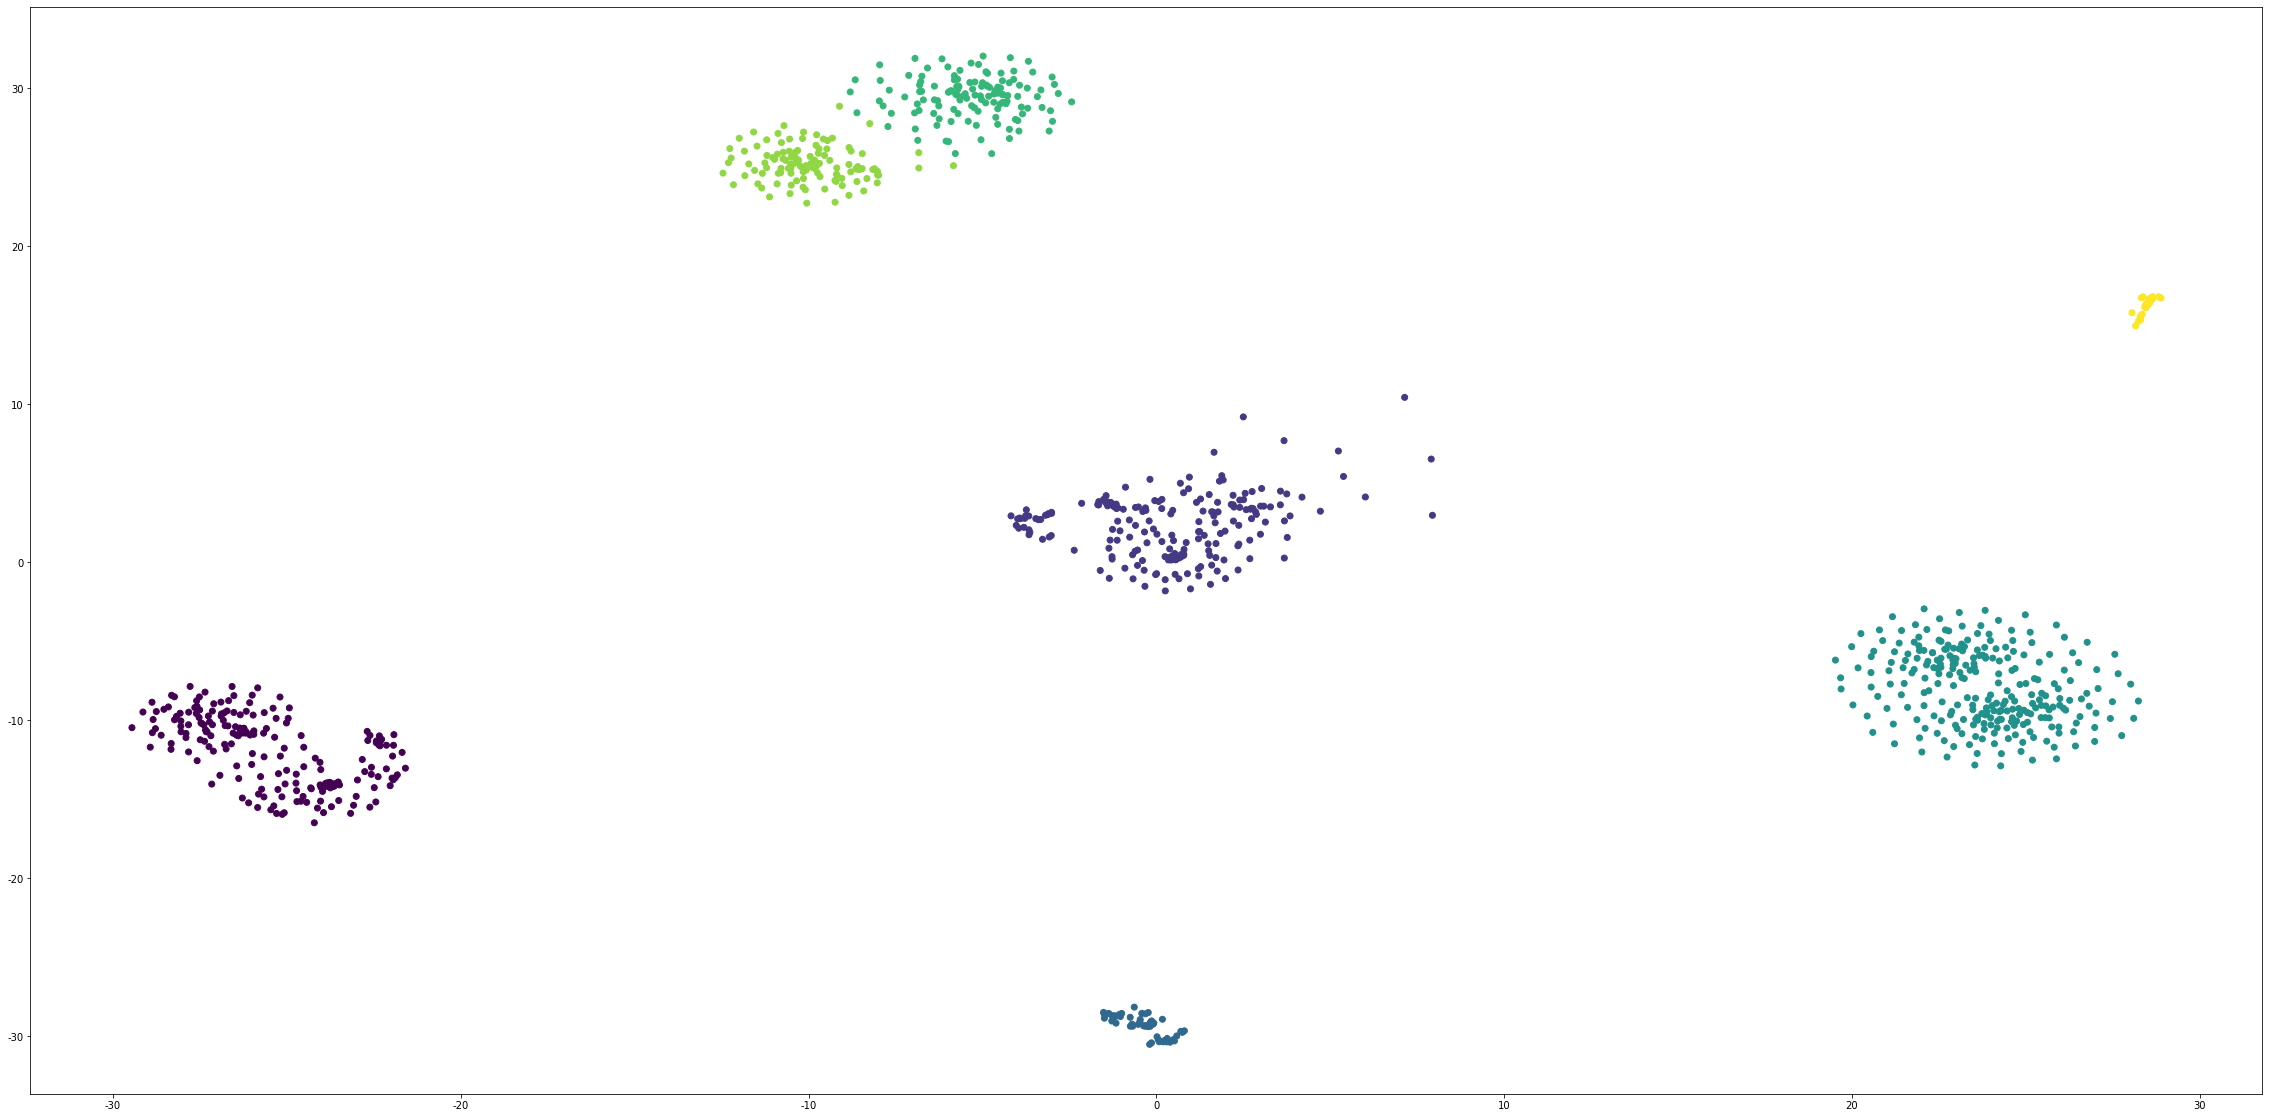

In [71]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'],c=labels)

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=0)
plt.show()